# Using RTE in synthesis mode

This is an example of how to use the program phi_rte.py to generate synthetic profiles. It uses (for the moment) CMILOS (ASCII) version.

In [1]:
# Loading libraries

import sys

sys.path.append('../../../')  
import matplotlib.pyplot as plt
import numpy as np

import sophi_fdt_dpp as fdt

### create input file for CMILOS

We will generate 5 different models for testing.

In [2]:
model = np.array([2000.,30.,30.,8.5, 0.070, 0.08, 0.2, 0.2, 0.8 ])
# B, gamma, phi, eta0, landadopp,aa, vlos, S0, S1
wave_axis = np.linspace(6173.3354-0.4,6173.3354+0.4,100)


In [3]:
res = fdt.phi_rte(model, wave_axis, rte_mode = 'SYN', cmd = '../../src/cmilos/./milos')

-------------------------------------------------------------- 
  cmilos version: CMILOS v0.91 (July - 2021) 
-------------------------------------------------------------- 
No input options. Setting for PHI only.
RTE_MODE  SYN
  ---- >>>>> Synthesizing data.... 
../../src/cmilos/./milos 100 30 1 1 0 0 0 ./dummy_in.txt > ./dummy_out.txt
0
  ---- >>>>> Finishing.... 
  ---- >>>>> Reading results.... 


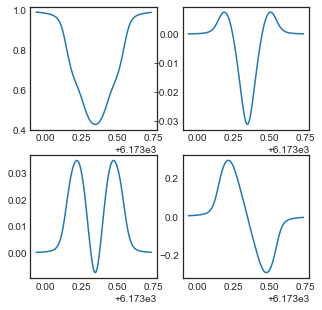

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(res[:,0],res[:,1])
ax[0,1].plot(res[:,0],res[:,2])
ax[1,0].plot(res[:,0],res[:,3])
ax[1,1].plot(res[:,0],res[:,4])
plt.show()


In [5]:
model_big = np.zeros((100,9))
for i in range(100):
    model_big[i,:] = [2000.,30.,30.,8.5, 0.070, 0.08, 0.2, 0.2, 0.8 ]
    model_big[i,0] = i*10



In [6]:
res_big = fdt.phi_rte(model_big, wave_axis, rte_mode = 'SYN', cmd = '../../src/cmilos/./milos')

-------------------------------------------------------------- 
  cmilos version: CMILOS v0.91 (July - 2021) 
-------------------------------------------------------------- 
No input options. Setting for PHI only.
RTE_MODE  SYN
  ---- >>>>> Synthesizing data.... 
../../src/cmilos/./milos 100 30 1 1 0 0 0 ./dummy_in.txt > ./dummy_out.txt
0
  ---- >>>>> Finishing.... 
  ---- >>>>> Reading results.... 


In [7]:
res_big = np.reshape(res_big,(100,100,5))

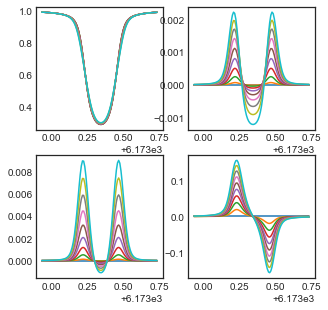

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2)
for i in range(10):
    ax[0,0].plot(res_big[0,:,0],res_big[i*7,:,1])
    ax[0,1].plot(res_big[0,:,0],res_big[i*7,:,2])
    ax[1,0].plot(res_big[0,:,0],res_big[i*7,:,3])
    ax[1,1].plot(res_big[0,:,0],res_big[i*7,:,4])
plt.show()